In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans


In [3]:
pat = "./DataSources/training.csv"
X = pd.read_csv(pat)
X.drop(columns=["cluster"], inplace=True)

In [4]:
y_df = X

# K-Means

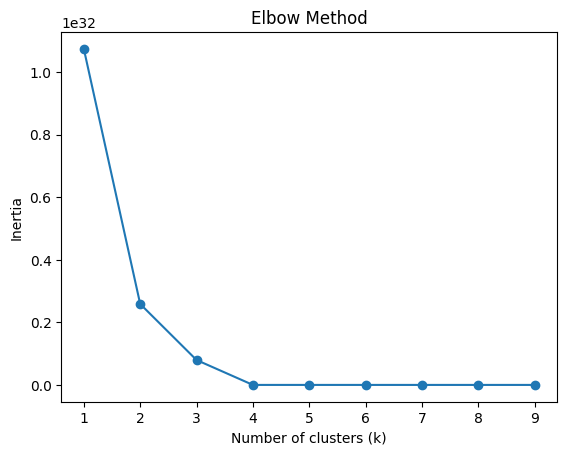

In [7]:
inertia_values = []

# Fit and plot the data for each k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 10), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [8]:

# Create KMeans instance
kmeans = KMeans(n_clusters=3)

# Fit the model to your data
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_
y_df['k_means'] = labels


In [9]:

cluster_agg = X.groupby('k_means').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'order_value_total': 'mean',
    'wallet_share_by_category': 'mean'
}).round(3)

cluster_agg


,recency,frequency,monetary,order_value_total,wallet_share_by_category
k_means,,,,,
0,202.167,7.989,967.272,940890.398,0.056
1,204.322,8.957,1129.151,949584.322,0.049
2,202.024,8.932,1075.441,978821.456,0.047


In [13]:
# save the cluster agg in to the  
X.to_csv('./DataSources/Segmented/clustered_df_k_means.csv', index=False)

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Create AgglomerativeClustering instance
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the model to your data
agg_clustering.fit(X)

# Get cluster labels
labels = agg_clustering.labels_
y_df['h_clusters'] = labels


In [22]:

cluster_agg = X.groupby('h_clusters').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'order_value_total': 'mean',
    'wallet_share_by_category': 'mean'
}).round(3)

cluster_agg


,recency,frequency,monetary,order_value_total,wallet_share_by_category
h_clusters,,,,,
0,203.278,9.370,1145.061,948311.013,0.051
1,202.024,8.932,1075.441,978821.456,0.047
2,204.295,7.204,940.927,943677.826,0.051


In [24]:
from sklearn.cluster import MeanShift

# Create MeanShift instance
meanshift = MeanShift()

# Fit the model to your data
meanshift.fit(X)

# Get cluster labels
labels = meanshift.labels_
y_df['m_clusters'] = labels

In [25]:

cluster_agg = X.groupby('m_clusters').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'order_value_total': 'mean',
    'wallet_share_by_category': 'mean'
}).round(3)

cluster_agg


,recency,frequency,monetary,order_value_total,wallet_share_by_category
m_clusters,,,,,
0,203.620,8.642,1076.444,946753.634,0.051
1,202.024,8.932,1075.441,978821.456,0.047
